# About

- ChocoballDetectorのモデルを学習する

In [1]:
%config Completer.use_jedi = False

In [2]:
import logging

In [3]:
from src import util
from src.preprocessor import ChocoPreProcessor
from src.trainer import ChocoTrainer

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
logger = logging.getLogger(__name__)
util.set_logger(logger)

In [6]:
IMG_DIR = "../data/train"
BBOX_DIR = "../data/train"
CLASSES_FILE = "../data/classes.txt"
OUT = "../out"

# 学習データの前処理

In [7]:
choco_prep = ChocoPreProcessor(logger=logger)
choco_prep.set_classes(class_file=CLASSES_FILE)

2021-03-23 08:06:51,768 - __main__ - INFO - set object class: ../data/classes.txt
2021-03-23 08:06:51,770 - __main__ - INFO - classes: dict_keys(['choco-ball', 'choco-package'])


{'choco-ball': 0, 'choco-package': 1}

In [8]:
_ = choco_prep.set_dataset(anno_dir=BBOX_DIR, img_dir=IMG_DIR)
bboxs = choco_prep.get_bbox_list()
imgs = choco_prep.get_img_array()
obj_ids = choco_prep.get_object_ids_list()
classes = choco_prep.get_object_classes()

2021-03-23 08:06:51,843 - __main__ - INFO - annotation_file_path: ../data/train
2021-03-23 08:06:51,845 - __main__ - INFO - image_file_path: ../data/train
2021-03-23 08:06:51,849 - __main__ - INFO - annotation_file_size: 26
100%|██████████| 26/26 [00:00<00:00, 210.72it/s]


# Trainerのセット

In [9]:
choco_trainer = ChocoTrainer(out=OUT, step_size=300, logger=logger)

2021-03-23 08:06:52,014 - __main__ - INFO - set output: ../out


directory not found : ../out
make directory : ../out


In [10]:
_ = choco_trainer.set_data(images=imgs, bboxs=bboxs, obj_ids=obj_ids)

2021-03-23 08:06:52,073 - __main__ - INFO - set_dataset: 26
2021-03-23 08:06:52,074 - __main__ - INFO - set_dataset(leys): ('img', 'bbox', 'label')


In [11]:
choco_trainer.set_model(n_class=len(classes))

2021-03-23 08:06:55,658 - __main__ - INFO - set FasterRCNNVGG16, pretrained=imagenet


In [12]:
choco_trainer.set_optimizer()

2021-03-23 08:06:55,686 - __main__ - INFO - set Optimizer: MomentumSGD


# Training

In [13]:
choco_trainer.run()

2021-03-23 08:06:56,436 - __main__ - INFO - use GPU: 0
2021-03-23 08:06:56,437 - __main__ - INFO - the num of train-dataset: 26
2021-03-23 08:06:56,438 - __main__ - INFO - set iterator
2021-03-23 08:06:56,440 - __main__ - INFO - optimizer: <class 'chainer.optimizers.momentum_sgd.MomentumSGD'>
2021-03-23 08:06:56,441 - __main__ - INFO - epochs: 20
2021-03-23 08:06:56,442 - __main__ - INFO - run training


iteration   epoch       elapsed_time  lr          main/loss   main/roi_loc_loss  main/roi_cls_loss  main/rpn_loc_loss  main/rpn_cls_loss  validation/main/map
26          1           9.07245       0.001       1.88953     0.510912           0.462641           0.351353           0.564621                                
52          2           17.8558       0.001       1.36593     0.498837           0.298615           0.259269           0.309209                                
78          3           26.5157       0.001       1.22483     0.47327            0.240237           0.23116            0.280164                                
104         4           35.1942       0.001       0.970253    0.395404           0.173374           0.178025           0.22345                                 
130         5           43.8103       0.001       0.849904    0.320697           0.161037           0.165445           0.202725                                
156         6           52.4911       0.00

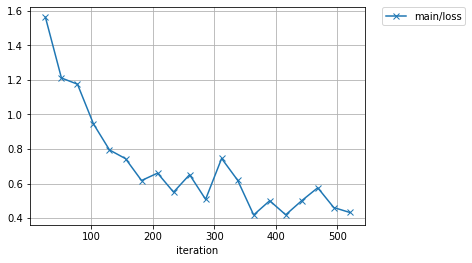

In [14]:
from IPython.display import Image
Image(filename=f"{OUT}/loss.png")

In [15]:
# 学習済みモデルをファイルに書き出す
model_file = f"{OUT}/choco_faster_rcnn.npz"
choco_trainer.save_model(file_name=model_file)

2021-03-23 08:10:57,125 - __main__ - INFO - output model as npz_file: ../out/choco_faster_rcnn.npz
